In [1]:
###################################################################################
# Course : Data Preparation
# Course code: DSC540
# Weeks: 5 and 6
# Script name : DSC540_Shekhar_Week5&6.ipynb
# Created Date : Apr 10th 2023
# Created By : Manish Shekhar
###################################################################################

## Activity 7: Reading tabular data from a webpage and creating data frames

### 1. Import BeautifulSoup and load the data

In [3]:
# importing the needed libraries
from bs4 import BeautifulSoup
import pandas as pd

### 2. Open the wikipedia file

In [8]:
# Opening the wikipedia file, reading it into Beatiful soup object and closing it
fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r")
soup = BeautifulSoup(fd)
fd.close()

### 3. Find all the tables using soup.find_all()

In [9]:
# Finding all table in the Beautiful Soup object
all_tables = soup.find_all("table")
print("Total number of tables are {}".format(len(all_tables)))

Total number of tables are 9


### 4. Find the right table by using the class attribute - "wikitable"

In [12]:
# Finding particular table using suip object
data_table = soup.find("table",{"class": '"wikitable"|}'})
print(type(data_table))

<class 'bs4.element.Tag'>


### 5. Separate the source and the actual data

In [17]:
# separate source and the actual data
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print("The total number of tables = ", len(sources_list))

The total number of tables =  3


### 6. Use findAll() to find data from the data_table's body tag

In [21]:
# Find data using tbody()
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)


### 7. Use findAll() to find the data from the data_table td tag

In [24]:
# getting data from data tables
data_tables = []
for td in data:
    data_tables.append(td.findAll("table"))

### 8. Find the length of data tables

In [25]:
# how many tables
len(data_tables)

3

### 9. Check how to get the source names

In [27]:
# Finding all source names
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


### 10. Separate header and the data from first source

In [30]:
# Extract the header from the data tables
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
header1

['Rank', 'Country', 'GDP(US$MM)']

### 11. Find the rows from data_tables using findAll()

In [32]:
# get all the rows from the data tables
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]


### 12. Find the data from rows1 using the strip() for each td tag

In [36]:
# Using strip() function to get rid of whitespaces around the string
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

### 13. Find the dataframe

In [38]:
# check the data
df1 = pd.DataFrame(data_rows1, columns=header1)
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


### 14. Do the same to other two sources

In [39]:
# Dig deeper and parse more using findAll()
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]

In [40]:
header2

['Rank', 'Country', 'GDP(US$MM)']

### 15. Find the rows from data_tables using findAll()

In [41]:
# Using findall() yet another time
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

### 16. Define find_right_text using strip()

In [62]:
# function definition for find_right_text()
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

### 17. Find the rows from data_rows using find_right_text

In [63]:
# Using function to extract more data
data_rows2 = [[find_right_text(i,td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

### 18. Calculate df2 dataframe

In [64]:
# Applying similar operation on data frame 2
df2 = pd.DataFrame(data_rows2, columns=header2)

In [65]:
# check teh data
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


### 19. Perform same operations for the third dataframe

In [66]:
# Using strip() to get red of whitespaces and findAll() to find all the tags
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]

In [67]:
# see the data
header3

['Rank', 'Country', 'GDP(US$MM)']

### 20. Find rows from data_tables using findAll()

In [68]:
# Use findAll() to get deeper into the data extract
row3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

### 21. Find the rows from data_rows3 by using find_right_text

In [69]:
# using find_rigt_text use defined function
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]

### 22. Calculate the df3

In [70]:
# Using similar operations for third data set
df3 = pd.DataFrame(data_rows3, columns = header3)

In [71]:
# see the data
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


## Activity 8 - Handling outliers and missing data

### 1. Load the data

In [72]:
# get required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Read the csv data file

In [74]:
# reading csv data file
df = pd.read_csv("visit_data.csv")

### 3. Print the data from dataframe

In [76]:
# check data
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


### 4. Check the duplicates

In [78]:
# check duplicates in the data
print("First name is duplicated - {}".format(any(df.first_name.duplicated())))

First name is duplicated - True


In [80]:
print("Last name is duplicated - {}".format(any(df.last_name.duplicated())))

Last name is duplicated - True


In [81]:
print("Email is duplicated - {}".format(any(df.email.duplicated())))

Email is duplicated - False


### 5. Check if any essential column contains NaN

In [82]:
# check if essential column contains NaN
print("The column Email contains NaN - %r " % df.email.isnull().values.any())

The column Email contains NaN - False 


In [83]:
print("The column IP Address contains NaN - %r " % df.ip_address.isnull().values.any())

The column IP Address contains NaN - False 


In [84]:
print("The column Visit contains NaN - %r " % df.visit.isnull().values.any())

The column Visit contains NaN - True 


### 6. Get rid of outliers

In [85]:
# restore the previous size of the data
size_prev = df.shape

In [86]:
# Get rid of records with null visits
df = df[np.isfinite(df['visit'])]

In [87]:
# set the after size of the data frame
size_after = df.shape

### 7. Report the size difference

In [88]:
# report the data frame size difference before and after the outlier records removal
print("The size of the previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".format(prev=size_prev, after=size_after))

The size of the previous data was - 1000 rows and the size of the new one is - 974 rows


### 8. Plot a boxplot to find if the data has outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe1f0e157c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe1f0e15d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe1f0e154f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe208e6f340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe208e6f610>],
 'means': []}

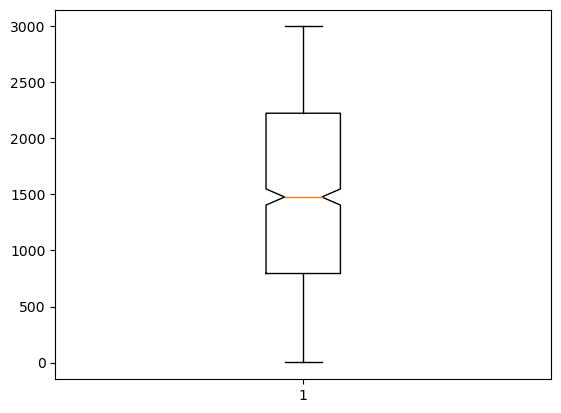

In [89]:
# plot box plots 
plt.boxplot(df.visit, notch=True)

In [90]:
# Observation - Data in visits column seems to be concentrated between ~700 and ~2300 
# and thus anything outside this range can be considered outliers

### 9. Get rid of values beyond 2900 and below 100 - these are outliers for us

In [92]:
# get rid of the outliers
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]

In [94]:
# check the size of the data frame after getting rid of outliers
print("After getting rid of outliers the new size of the data is - {}".format(*df1.shape))

After getting rid of outliers the new size of the data is - 923


# Operations with Sqllite database

In [2]:
# importing the sqlite3
import sqlite3

In [25]:
# create a table with following columns - Name, Address, City, State, Zip, Phone Number
# open a connection
conn = sqlite3.connect('javatpoint.db')  
print("Opened database successfully")

Opened database successfully


In [26]:
# Execute the create table statement
conn.execute('CREATE TABLE Person (ID INT PRIMARY KEY NOT NULL, NAME TEXT NOT NULL, ADDRESS CHAR(50), CITY CHAR(20), STATE CHAR(2), ZIP INT, PHONE_NUMBER CHAR(15))')
print("Table created successfully")

Table created successfully


In [27]:
# Insert data into the table
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (1, 'Manish', '21 S ST', 'PHOENIX', 'AZ', '85050', '420-345-6756')")
print("Row inserted successfully")

Row inserted successfully


In [28]:
# Insert 9 more records per requirement
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (2, 'Cathy', 'Snow Blvd', 'CHICAGO', 'IL', '34076', '456-467-4878')")
print("Row inserted successfully")
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (3, 'Mat', 'Fast Lane', 'NEW YORK', 'NY', '12035', '540-647-3768')")
print("Row inserted successfully")
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (4, 'Bill', 'Trance St', 'MIAMI', 'FL', '73877', '787-988-5453')")
print("Row inserted successfully")
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (5, 'Ahsan', 'Rainy St', 'SEATTLE', 'WA', '89799', '344-445-6688')")
print("Row inserted successfully")
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (6, 'KAREENA', 'W MAIN ST', 'LOS ANGELES', 'CA', '90980', '788-565-6798')")
print("Row inserted successfully")
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (7, 'ELISE', '200 HOLLYWOOD LN', 'LOS ANGELES', 'CA', '95567', '785-788-7878')")
print("Row inserted successfully")
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (8, 'ARIANA', '320 S ROSE LN', 'ATLANTA', 'GA', '76677', '344-788-9886')")
print("Row inserted successfully")
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (9, 'JOSEPH', '23 E DUREY Blvd', 'IDAHO FALLS', 'ID', '26678', '680-787-9799')")
print("Row inserted successfully")
conn.execute("INSERT INTO Person (ID,NAME,ADDRESS,CITY,STATE,ZIP,PHONE_NUMBER) VALUES (10, 'TOM', '43 BROOMFIELD', 'BLOOMINGTON', 'NM', '66777', '556-788-3568')")
print("Row inserted successfully")


Row inserted successfully
Row inserted successfully
Row inserted successfully
Row inserted successfully
Row inserted successfully
Row inserted successfully
Row inserted successfully
Row inserted successfully
Row inserted successfully


In [29]:
# Select data to check
data = conn.execute("select * from Person")

# Display selected data
for row in data:
    print("ID = ", row[0]) 
    print("NAME = ", row[1])  
    print("ADDRESS = ", row[2]) 
    print("CITY = ", row[3])
    print("STATE = ", row[4])
    print("ZIP = ", row[5])
    print("PHONE_NUMBER = ", row[6]), "\n"

ID =  1
NAME =  Manish
ADDRESS =  21 S ST
CITY =  PHOENIX
STATE =  AZ
ZIP =  85050
PHONE_NUMBER =  420-345-6756
ID =  2
NAME =  Cathy
ADDRESS =  Snow Blvd
CITY =  CHICAGO
STATE =  IL
ZIP =  34076
PHONE_NUMBER =  456-467-4878
ID =  3
NAME =  Mat
ADDRESS =  Fast Lane
CITY =  NEW YORK
STATE =  NY
ZIP =  12035
PHONE_NUMBER =  540-647-3768
ID =  4
NAME =  Bill
ADDRESS =  Trance St
CITY =  MIAMI
STATE =  FL
ZIP =  73877
PHONE_NUMBER =  787-988-5453
ID =  5
NAME =  Ahsan
ADDRESS =  Rainy St
CITY =  SEATTLE
STATE =  WA
ZIP =  89799
PHONE_NUMBER =  344-445-6688
ID =  6
NAME =  KAREENA
ADDRESS =  W MAIN ST
CITY =  LOS ANGELES
STATE =  CA
ZIP =  90980
PHONE_NUMBER =  788-565-6798
ID =  7
NAME =  ELISE
ADDRESS =  200 HOLLYWOOD LN
CITY =  LOS ANGELES
STATE =  CA
ZIP =  95567
PHONE_NUMBER =  785-788-7878
ID =  8
NAME =  ARIANA
ADDRESS =  320 S ROSE LN
CITY =  ATLANTA
STATE =  GA
ZIP =  76677
PHONE_NUMBER =  344-788-9886
ID =  9
NAME =  JOSEPH
ADDRESS =  23 E DUREY Blvd
CITY =  IDAHO FALLS
STATE =  I

In [30]:
# Delete data to have clean slate and show output - this is for test only
# conn.close()
# conn = sqlite3.connect('javatpoint.db')  
# conn.execute("drop table Person")